# Key Performance Indicators

In [62]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_colwidth', None)
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
from scipy.stats import zscore
from collections import defaultdict
import pytz


In [63]:
df_ev = pd.read_csv("data/cleaned_chargingdata.csv")
df_weather = pd.read_csv("data/cleaned_weather_data.csv")

In [64]:
df_ev.dtypes

Unnamed: 0.1          int64
Unnamed: 0            int64
id                   object
connectionTime       object
disconnectTime       object
doneChargingTime     object
kWhDelivered        float64
sessionID            object
siteID                int64
spaceID              object
stationID            object
timezone             object
userID              float64
chargingDuration    float64
dtype: object

In [65]:
df_ev['id'] = df_ev['id'].astype('string')

df_ev['connectionTime'] = pd.to_datetime(df_ev['connectionTime'], errors='coerce', utc=True)  
df_ev['disconnectTime'] = pd.to_datetime(df_ev['disconnectTime'], errors='coerce', utc=True)  
df_ev['doneChargingTime'] = pd.to_datetime(df_ev['doneChargingTime'], errors='coerce', utc=True) 

df_ev['connectionTime'] = df_ev['connectionTime'].dt.tz_convert('America/Los_Angeles')
df_ev['disconnectTime'] = df_ev['disconnectTime'].dt.tz_convert('America/Los_Angeles')
df_ev['doneChargingTime'] = df_ev['doneChargingTime'].dt.tz_convert('America/Los_Angeles')

# df_ev['connectionTime'] = df_ev['connectionTime'].str.replace(r'(-08:00)|(-07:00)', '', regex=True)
# df_ev['disconnectTime'] = df_ev['disconnectTime'].str.replace(r'(-08:00)|(-07:00)', '', regex=True)
# df_ev['doneChargingTime'] = df_ev['doneChargingTime'].str.replace(r'(-08:00)|(-07:00)', '', regex=True)

# df_ev['sessionID'] = df_ev['sessionID'].astype('string')
#df_ev['siteID'] = df_ev['siteID'].astype('string')
# df_ev['spaceID'] = df_ev['spaceID'].astype('string')
# df_ev['stationID'] = df_ev['stationID'].astype('string')
# df_ev['timezone'] = df_ev['timezone'].astype('string')
# df_ev['userID'] = df_ev['userID'].astype('string')

In [66]:
df_ev.dtypes

Unnamed: 0.1                                      int64
Unnamed: 0                                        int64
id                                       string[python]
connectionTime      datetime64[ns, America/Los_Angeles]
disconnectTime      datetime64[ns, America/Los_Angeles]
doneChargingTime    datetime64[ns, America/Los_Angeles]
kWhDelivered                                    float64
sessionID                                        object
siteID                                            int64
spaceID                                          object
stationID                                        object
timezone                                         object
userID                                          float64
chargingDuration                                float64
dtype: object

In [11]:
df_ev

,Unnamed: 0.1,Unnamed: 0,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,timezone,userID,chargingDuration
0,0,0,5e23b149f9af8b5fe4b973cf,2020-01-02 05:08:54-08:00,2020-01-02 11:11:15-08:00,2020-01-02 09:31:35-08:00,25.016,1_1_179_810_2020-01-02 13:08:53.870034,1,AG-3F30,1-1-179-810,America/Los_Angeles,194.0,262.683333
1,1,1,5e23b149f9af8b5fe4b973d0,2020-01-02 05:36:50-08:00,2020-01-02 14:38:21-08:00,2020-01-02 12:18:05-08:00,33.097,1_1_193_825_2020-01-02 13:36:49.599853,1,AG-1F01,1-1-193-825,America/Los_Angeles,4275.0,401.250000
2,2,2,5e23b149f9af8b5fe4b973d1,2020-01-02 05:56:35-08:00,2020-01-02 16:39:22-08:00,2020-01-02 08:35:06-08:00,6.521,1_1_193_829_2020-01-02 13:56:35.214993,1,AG-1F03,1-1-193-829,America/Los_Angeles,344.0,158.516667
3,3,3,5e23b149f9af8b5fe4b973d2,2020-01-02 05:59:58-08:00,2020-01-02 08:38:39-08:00,2020-01-02 07:18:45-08:00,2.355,1_1_193_820_2020-01-02 13:59:58.309319,1,AG-1F04,1-1-193-820,America/Los_Angeles,1117.0,78.783333
4,4,4,5e23b149f9af8b5fe4b973d3,2020-01-02 06:00:01-08:00,2020-01-02 14:08:40-08:00,2020-01-02 10:17:30-08:00,13.375,1_1_193_819_2020-01-02 14:00:00.779967,1,AG-1F06,1-1-193-819,America/Los_Angeles,334.0,257.483333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64987,65032,8670,5d2fbdd3f9af8b4d0dd0d54a,2019-07-01 14:49:12-07:00,2019-07-01 18:37:18-07:00,2019-07-01 16:14:33-07:00,8.399,1_1_179_798_2019-07-01 21:49:11.873404,1,AG-3F18,1-1-179-798,America/Los_Angeles,1346.0,85.350000
64988,65033,8671,5d2fbdd3f9af8b4d0dd0d54b,2019-07-01 14:58:45-07:00,2019-07-01 17:39:48-07:00,2019-07-01 17:39:48-07:00,16.864,1_1_179_794_2019-07-01 21:58:44.571011,1,AG-3F20,1-1-179-794,America/Los_Angeles,364.0,161.050000
64989,65034,8672,5d2fbdd3f9af8b4d0dd0d54c,2019-07-01 15:02:21-07:00,2019-07-01 17:58:50-07:00,2019-07-01 17:58:50-07:00,18.335,1_1_191_807_2019-07-01 22:02:20.810735,1,AG-4F47,1-1-191-807,America/Los_Angeles,2050.0,176.483333
64990,65035,8673,5d2fbdd3f9af8b4d0dd0d54d,2019-07-01 15:23:44-07:00,2019-07-01 19:03:36-07:00,2019-07-01 19:03:36-07:00,22.815,1_1_179_781_2019-07-01 22:23:32.496137,1,AG-3F31,1-1-179-781,America/Los_Angeles,1626.0,219.866667


In [67]:
site1 = df_ev[df_ev.siteID == 1]
site1.spaceID.unique()

array(['AG-3F30', 'AG-1F01', 'AG-1F03', 'AG-1F04', 'AG-1F06', 'AG-1F13',
       'AG-1F09', 'AG-4F34', 'AG-1F11', 'AG-1F08', 'AG-3F22', 'AG-1F14',
       'AG-1F07', 'AG-1F12', 'AG-3F29', 'AG-1F05', 'AG-3F18', 'AG-1F10',
       'AG-3F16', 'AG-4F37', 'AG-1F02', 'AG-3F28', 'AG-3F25', 'AG-3F24',
       'AG-3F33', 'AG-3F23', 'AG-3F31', 'AG-3F32', 'AG-3F27', 'AG-3F26',
       'AG-3F20', 'AG-3F17', 'AG-3F21', 'AG-3F19', 'AG-4F44', 'AG-4F52',
       'AG-4F41', 'AG-4F48', 'AG-4F35', 'AG-4F50', 'AG-3F15', 'AG-4F51',
       'AG-4F47', 'AG-4F46', 'AG-4F49', 'AG-4F43', 'AG-4F42', 'AG-4F45',
       'AG-4F36', 'AG-4F38', 'AG-4F40', 'AG-4F39'], dtype=object)

In [68]:
site2 = df_ev[df_ev.siteID == 2]
site2.spaceID.unique()

array(['CA-512', 'CA-327', 'CA-326', 'CA-303', 'CA-325', 'CA-311',
       'CA-309', 'CA-491', 'CA-493', 'CA-499', 'CA-323', 'CA-313',
       'CA-324', 'CA-513', 'CA-305', 'CA-317', 'CA-510', 'CA-315',
       'CA-321', 'CA-490', 'CA-497', 'CA-489', 'CA-319', 'CA-492',
       'CA-494', 'CA-502', 'CA-500', 'CA-495', 'CA-498', 'CA-304',
       'CA-307', 'CA-306', 'CA-501', 'CA-318', 'CA-308', 'CA-316',
       'CA-312', 'CA-320', 'CA-212', 'CA-508', 'CA-322', 'CA-314',
       'CA-503', 'CA-504', 'CA-496', 'CA-310', 'CA-506', 'CA-149',
       'CA-509', 'CA-507', 'CA-511', 'CA-213', 'CA-505', 'CA-148',
       '11900388'], dtype=object)

## 1. Hourly Utilization Rate

In [36]:
# Define the total number of spaces per site (example values)
total_spaces = {
    1: 52,  # Replace with the actual number of spaces for site 1
    2: 54   # Replace with the actual number of spaces for site 2
}

# Create a new df_evFrame to hold hourly df_ev
start_time = df_ev['connectionTime'].min().replace(minute=0, second=0, microsecond=0)
end_time = df_ev['disconnectTime'].max().replace(minute=0, second=0, microsecond=0) + timedelta(hours=1)

# Generate hourly intervals
times = pd.date_range(start=start_time, end=end_time, freq='H')
hourly_df_ev = []

for time in times:
    # For each hour, calculate utilization for each site
    hourly_entry = {'hour': time}
    for site in total_spaces.keys():
        # Filter sessions active during the hour for the site
        active_sessions = df_ev[(df_ev['siteID'] == site) &
                             (df_ev['connectionTime'] <= time + timedelta(hours=1)) &
                             (df_ev['disconnectTime'] > time)]

        # Calculate utilization rate
        utilization = len(active_sessions['spaceID'].unique()) / total_spaces[site]
        hourly_entry[f'utilization_{site}'] = utilization

    hourly_df_ev.append(hourly_entry)

# Create df_evFrame for hourly utilization
hourly_df = pd.DataFrame(hourly_df_ev)

# Display the result
hourly_df.head()

,hour,utilization_1,utilization_2
0,2018-04-25 04:00:00-07:00,0.0,0.018519
1,2018-04-25 05:00:00-07:00,0.0,0.018519
2,2018-04-25 06:00:00-07:00,0.0,0.055556
3,2018-04-25 07:00:00-07:00,0.0,0.129630
4,2018-04-25 08:00:00-07:00,0.0,0.407407


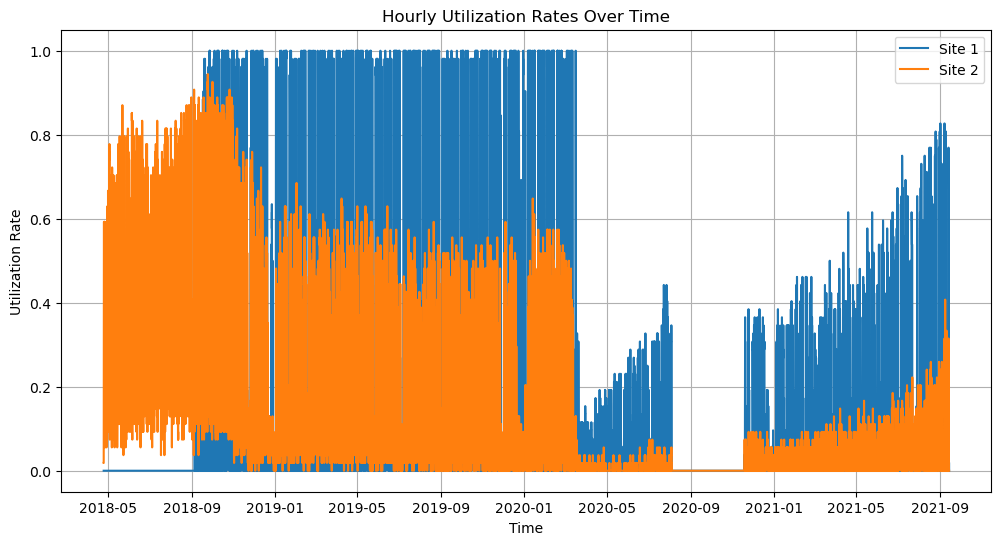

In [37]:
plt.figure(figsize=(12, 6))
for site in total_spaces.keys():
    plt.plot(hourly_df['hour'], hourly_df[f'utilization_{site}'], label=f'Site {site}')

plt.title('Hourly Utilization Rates Over Time')
plt.xlabel('Time')
plt.ylabel('Utilization Rate')
plt.legend()
plt.grid()
plt.show()

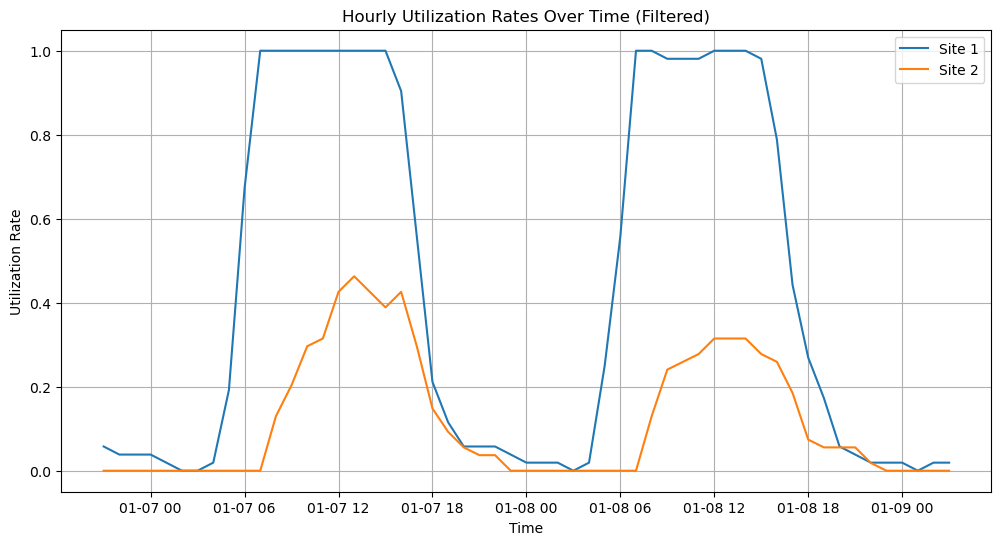

In [38]:

# Filter the timeframe
timezone = pytz.timezone('America/Los_Angeles')
filtered_start_time = datetime(2020, 1, 7, 6, 0).astimezone(timezone)  # Example start time
filtered_end_time = datetime(2020, 1, 9, 12, 0).astimezone(timezone)  # Example end time
filtered_df = hourly_df[(hourly_df['hour'] >= filtered_start_time) & (hourly_df['hour'] <= filtered_end_time)]

# Visualization
plt.figure(figsize=(12, 6))
for site in total_spaces.keys():
    plt.plot(filtered_df['hour'], filtered_df[f'utilization_{site}'], label=f'Site {site}')

plt.title('Hourly Utilization Rates Over Time (Filtered)')
plt.xlabel('Time')
plt.ylabel('Utilization Rate')
plt.legend()
plt.grid()
plt.show()

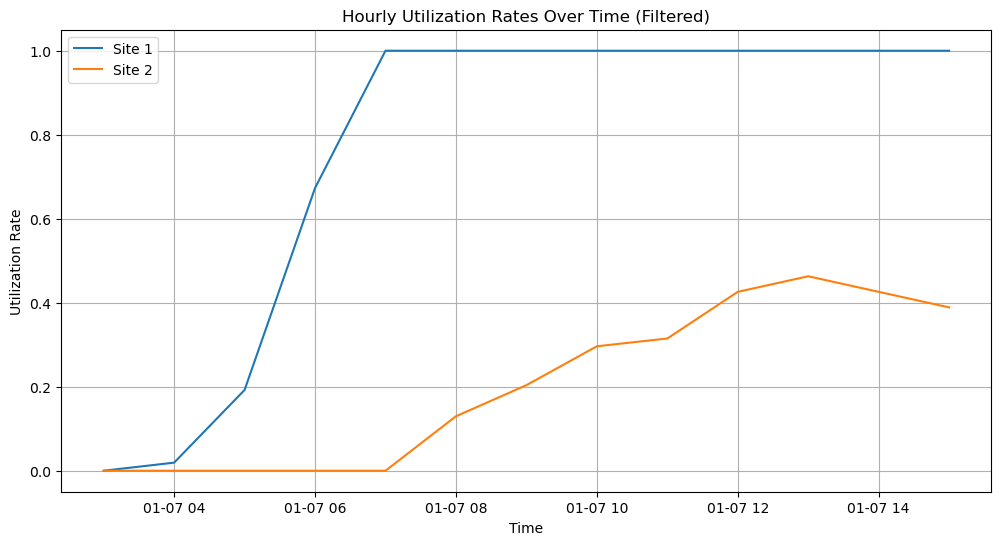

In [39]:
timezone = pytz.timezone('America/Los_Angeles')
filtered_start_time = datetime(2020, 1, 7, 12, 0).astimezone(timezone)  # Example start time
filtered_end_time = datetime(2020, 1, 8, 0, 0).astimezone(timezone)  # Example end time
filtered_df = hourly_df[(hourly_df['hour'] >= filtered_start_time) & (hourly_df['hour'] <= filtered_end_time)]

# Visualization
plt.figure(figsize=(12, 6))
for site in total_spaces.keys():
    plt.plot(filtered_df['hour'], filtered_df[f'utilization_{site}'], label=f'Site {site}')

plt.title('Hourly Utilization Rates Over Time (Filtered)')
plt.xlabel('Time')
plt.ylabel('Utilization Rate')
plt.legend()
plt.grid()
plt.show()

# 2 Average Hourly Session Duration

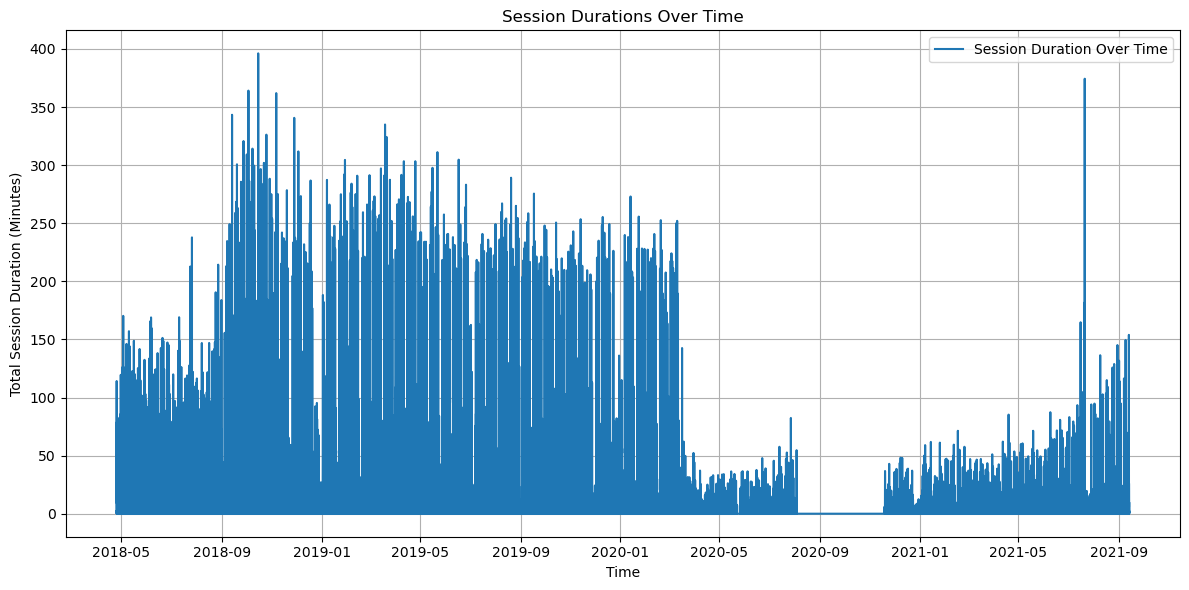

In [98]:
# Convert connectionTime and disconnectTime to datetime
df_ev['connectionTime'] = pd.to_datetime(df_ev['connectionTime'])
df_ev['disconnectTime'] = pd.to_datetime(df_ev['disconnectTime'])

# Calculate session duration in minutes
df_ev['sessionDuration'] = (df_ev['disconnectTime'] - df_ev['connectionTime']).dt.total_seconds() / 3600

# Group data by hour and sum session durations
session_duration_over_time = df_ev.resample('H', on='connectionTime')['sessionDuration'].sum().reset_index()

# Plot session durations over time
plt.figure(figsize=(12, 6))
plt.plot(
    session_duration_over_time['connectionTime'], 
    session_duration_over_time['sessionDuration'], 
    label='Session Duration Over Time', 
)
plt.title('Session Durations Over Time')
plt.xlabel('Time')
plt.ylabel('Total Session Duration (Minutes)')
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()


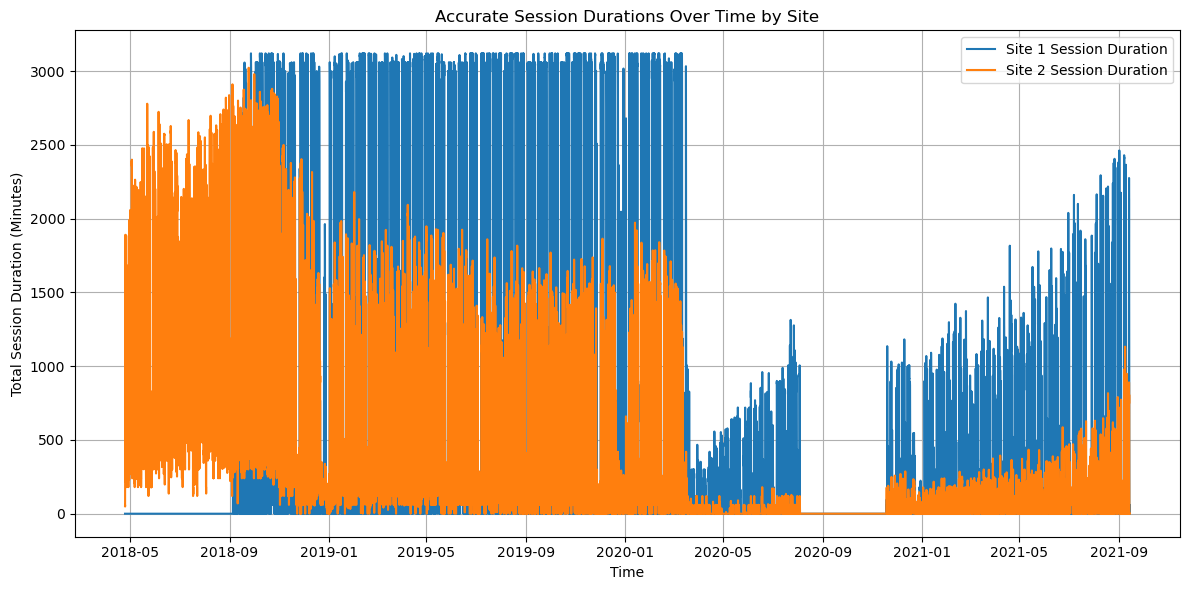

In [ ]:
total_spaces = {
    1: 52,  # number of spaces for site 1
    2: 54   # number of spaces for site 2
}

# Ensure datetime conversion
df_ev['connectionTime'] = pd.to_datetime(df_ev['connectionTime'])
df_ev['disconnectTime'] = pd.to_datetime(df_ev['disconnectTime'])

# Generate hourly intervals
start_time = df_ev['connectionTime'].min().replace(minute=0, second=0, microsecond=0)
end_time = df_ev['disconnectTime'].max().replace(minute=0, second=0, microsecond=0) + timedelta(hours=1)
times = pd.date_range(start=start_time, end=end_time, freq='H')

# Initialize hourly session durations list
hourly_session_durations = []

for time in times:
    hourly_entry = {'hour': time}
    for site in total_spaces.keys():
        # Filter sessions active during the hour for the site
        df_ev['sessionDuration'] = (df_ev['disconnectTime'] - df_ev['connectionTime']).dt.total_seconds() / 3600                      # Ended after the hour starts
        
        
        # Calculate the fractional duration of each session in the hour
        total_session_duration = 0
        for _, session in active_sessions.iterrows():
            # Determine overlap with the current hour
            start_of_overlap = max(session['connectionTime'], time)
            end_of_overlap = min(session['disconnectTime'], time + timedelta(hours=1))
            overlap_duration = (end_of_overlap - start_of_overlap).total_seconds() / 3600  # Convert to hours
            total_session_duration += overlap_duration
        
        # Add the total session duration for this site in the current hour
        hourly_entry[f'sessionDuration_{site}'] = total_session_duration
    hourly_session_durations.append(hourly_entry)

# Convert to DataFrame
hourly_session_df = pd.DataFrame(hourly_session_durations)

# Visualization: Plot session durations by site over time
plt.figure(figsize=(12, 6))
for site in total_spaces.keys():
    plt.plot(
        hourly_session_df['hour'], 
        hourly_session_df[f'sessionDuration_{site}'] * 60,  # Convert hours to minutes
        label=f'Site {site} Session Duration'
    )

plt.title('Accurate Session Durations Over Time by Site')
plt.xlabel('Time')
plt.ylabel('Total Session Duration (Minutes)')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


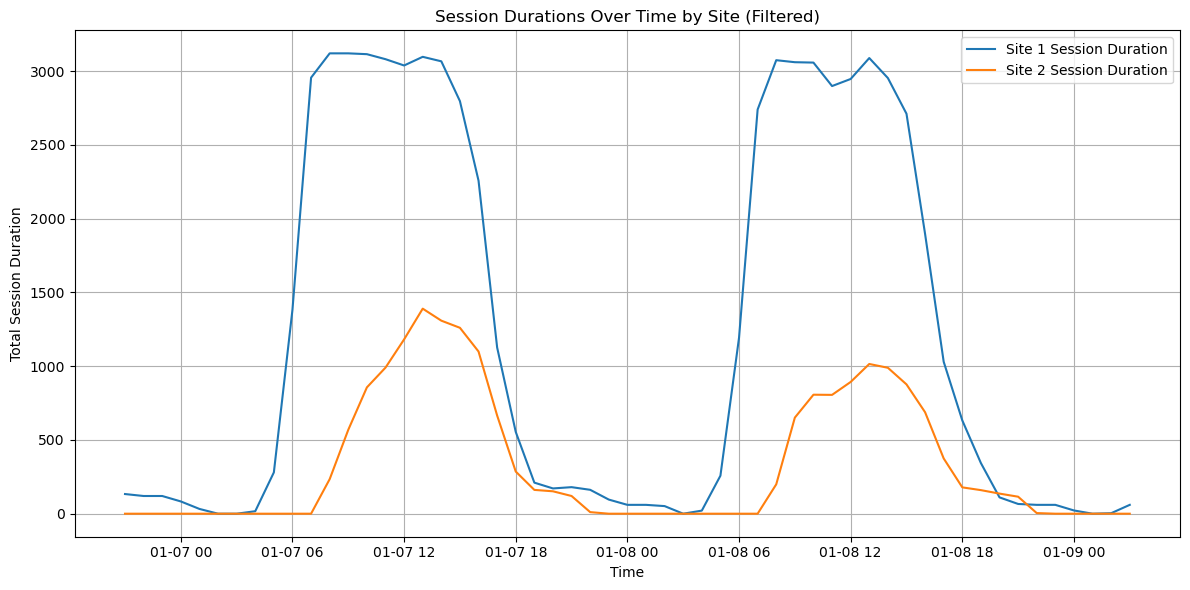

In [110]:
# Define the timezone and filter timeframe
timezone = pytz.timezone('America/Los_Angeles')
filtered_start_time = datetime(2020, 1, 7, 6, 0).astimezone(timezone)  # Example start time
filtered_end_time = datetime(2020, 1, 9, 12, 0).astimezone(timezone)  # Example end time

# Ensure the 'hour' column is converted to the correct timezone
hourly_session_df['hour'] = hourly_session_df['hour'].dt.tz_convert(timezone)

# Filter the DataFrame based on the timeframe
filtered_session_duration_df = hourly_session_df[
    (hourly_session_df['hour'] >= filtered_start_time) & 
    (hourly_session_df['hour'] <= filtered_end_time)
]

# Visualization: Plot the filtered session durations for each site
plt.figure(figsize=(12, 6))
for site in total_spaces.keys():
    plt.plot(
        filtered_session_duration_df['hour'], 
        filtered_session_duration_df[f'sessionDuration_{site}'] *60, 
        label=f'Site {site} Session Duration'
    )

plt.title('Session Durations Over Time by Site (Filtered)')
plt.xlabel('Time')
plt.ylabel('Total Session Duration')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

### Calculate Average Ession Durations, which coould be updated in real time on a dashboard

In [75]:
df_ev['session_duration'] = (df_ev['disconnectTime'] - df_ev['connectionTime']).dt.total_seconds() / 60

average_duration = df_ev['session_duration'].mean()

print(f"Average Duration of Charging Sessions: {average_duration:.2f} minutes")

Average Duration of Charging Sessions: 374.96 minutes


In [76]:
def calculate_average_session_duration(site_id, df_ev):

    # Filter data for the given siteID
    site_data = df_ev[df_ev['siteID'] == site_id].copy()

    # Ensure datetime columns are in datetime format
    site_data['connectionTime'] = pd.to_datetime(site_data['connectionTime'])
    site_data['disconnectTime'] = pd.to_datetime(site_data['disconnectTime'])

    # Calculate session duration (difference between disconnectTime and connectionTime)
    site_data['sessionDuration'] = (site_data['disconnectTime'] - site_data['connectionTime']).dt.total_seconds() / 60  # in minutes

    # Calculate the average session duration
    avg_session_duration = site_data['sessionDuration'].mean()

    return avg_session_duration



In [77]:
avg_duration_site1 = calculate_average_session_duration(1, df_ev)
avg_duration_site2 = calculate_average_session_duration(2, df_ev)

print(f"Average session duration for Site 1: {avg_duration_site1:.2f} minutes")
print(f"Average session duration for Site 2: {avg_duration_site2:.2f} minutes")

Average session duration for Site 1: 410.67 minutes
Average session duration for Site 2: 336.69 minutes


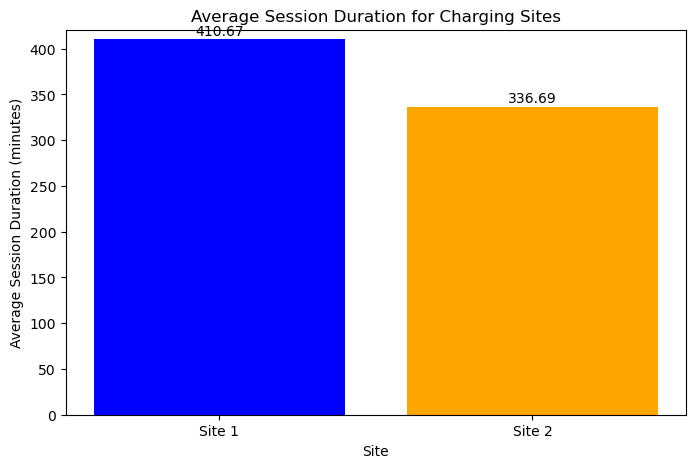

In [100]:
def plot_avg_session_duration(avg_durations, sites):

    plt.figure(figsize=(8, 5))
    plt.bar(sites, avg_durations, color=['blue', 'orange'])

    plt.xlabel('Site')
    plt.ylabel('Average Session Duration (minutes)')
    plt.title('Average Session Duration for Charging Sites')
    plt.ylim(0, max(avg_durations) + 10) 


    for i, v in enumerate(avg_durations):
        plt.text(i, v + 1, f'{v:.2f}', ha='center', va='bottom', fontsize=10)

    plt.show()

# Calculate the average session duration for both sites
avg_duration_site1 = calculate_average_session_duration(1, df_ev)
avg_duration_site2 = calculate_average_session_duration(2, df_ev)

# Prepare the data for plotting
avg_durations = [avg_duration_site1, avg_duration_site2]
sites = ['Site 1', 'Site 2']

# Call the plotting function
plot_avg_session_duration(avg_durations, sites)

In [79]:
def calculate_total_hourly_session_duration(site_id, df_ev):
    
    site_data = df_ev[df_ev['siteID'] == site_id].copy()
    print(f"Number of rows for siteID {site_id}: {len(site_data)}")

    if len(site_data) == 0:
        print(f"No data found for siteID {site_id}. Please check your data.")
        return pd.DataFrame()  # Return an empty DataFrame if no data for siteID

    #site_data['connectionTime'] = pd.to_datetime(site_data['connectionTime'], errors='coerce')
    #site_data['disconnectTime'] = pd.to_datetime(site_data['disconnectTime'], errors='coerce')
    #print(f"First few rows of data for siteID {site_id}:")
    #print(site_data[['connectionTime', 'disconnectTime']].head())

    site_data['sessionDuration'] = (site_data['disconnectTime'] - site_data['connectionTime']).dt.total_seconds() / 60  # in minutes
    site_data['connectionHour'] = site_data['connectionTime'].dt.hour

    # Check the data after calculation
    print(f"Data after calculating session durations for siteID {site_id}:")
    print(site_data[['connectionHour', 'sessionDuration']].head())

    # Calculate the total session duration per hour
    total_hourly_duration = site_data.groupby('connectionHour')['sessionDuration'].sum().reset_index()

    # Debugging: Check if we got any valid total hourly duration
    print(f"Total hourly session duration for siteID {site_id}:")
    print(total_hourly_duration)

    return total_hourly_duration


# Calculate the total hourly session duration for Site 1
total_hourly_duration_site1 = calculate_total_hourly_session_duration(1, df_ev)

# Calculate the total hourly session duration for Site 2
total_hourly_duration_site2 = calculate_total_hourly_session_duration(2, df_ev)


Number of rows for siteID 1: 33620
Data after calculating session durations for siteID 1:
   connectionHour  sessionDuration
0               5       362.350000
1               5       541.516667
2               5       642.783333
3               5       158.683333
4               6       488.650000
Total hourly session duration for siteID 1:
    connectionHour  sessionDuration
0                0     8.220033e+03
1                1     4.466883e+03
2                2     9.839517e+03
3                3     3.345947e+04
4                4     1.477826e+05
5                5     1.300640e+06
6                6     3.722704e+06
7                7     4.684394e+06
8                8     1.040667e+06
9                9     5.196585e+05
10              10     2.697879e+05
11              11     4.166700e+05
12              12     4.566972e+05
13              13     2.947383e+05
14              14     2.723222e+05
15              15     2.660244e+05
16              16     1.625077e+05
17      

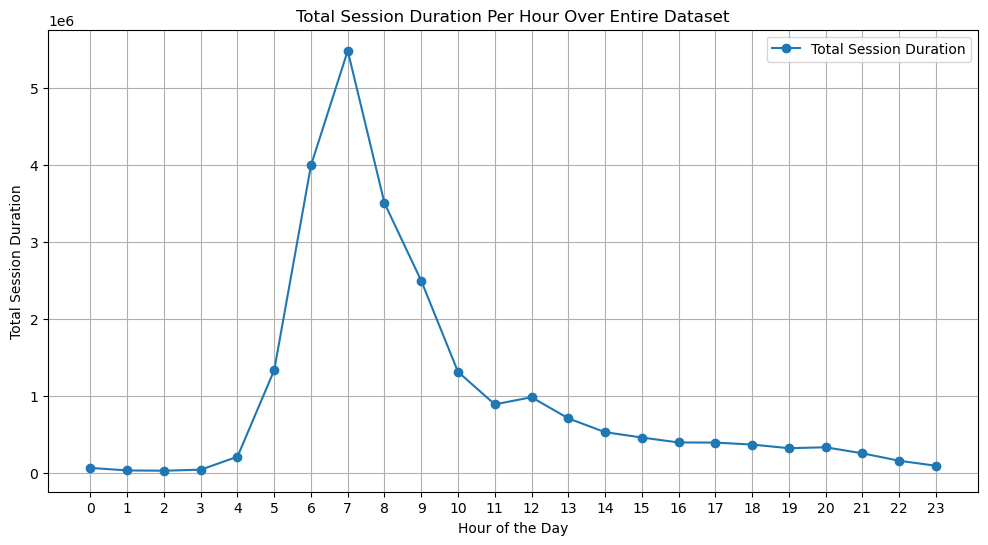

In [82]:
# Calculate total session duration per hour over the entire dataset
total_hourly_duration = df_ev.copy()
total_hourly_duration['connectionTime'] = pd.to_datetime(total_hourly_duration['connectionTime'])
total_hourly_duration['disconnectTime'] = pd.to_datetime(total_hourly_duration['disconnectTime'])

# Add session duration in hours
total_hourly_duration['sessionDuration'] = (total_hourly_duration['disconnectTime'] - total_hourly_duration['connectionTime']).dt.total_seconds() / 60

# Extract hour of the day from connectionTime
total_hourly_duration['connectionHour'] = total_hourly_duration['connectionTime'].dt.hour

# Group by hour to calculate total session duration
total_session_duration_per_hour = total_hourly_duration.groupby('connectionHour')['sessionDuration'].sum().reset_index()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(
    total_session_duration_per_hour['connectionHour'], 
    total_session_duration_per_hour['sessionDuration'], 
    marker='o', 
    label='Total Session Duration'
)
plt.title('Total Session Duration Per Hour Over Entire Dataset')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Session Duration')
plt.xticks(range(0, 24))
plt.grid()
plt.legend()
plt.show()


In [114]:
def calculate_avg_hourly_session_duration(site_id, df_ev):
 
    site_data = df_ev[df_ev['siteID'] == site_id].copy()
    print(f"Number of rows for siteID {site_id}: {len(site_data)}")

    site_data['sessionDuration'] = (site_data['disconnectTime'] - site_data['connectionTime']).dt.total_seconds() / 60  # in minutes


    site_data['connectionHour'] = site_data['connectionTime'].dt.hour
    print(f"Data after calculating session durations for siteID {site_id}:")
    print(site_data[['connectionHour', 'sessionDuration']].head())

    # Calculate the average session duration per hour
    avg_hourly_duration = site_data.groupby('connectionHour')['sessionDuration'].mean().reset_index()
    print(f"Average hourly session duration for siteID {site_id}:")
    print(avg_hourly_duration)

    return avg_hourly_duration

avg_hourly_duration_site1 = calculate_avg_hourly_session_duration(1, df_ev)
avg_hourly_duration_site2 = calculate_avg_hourly_session_duration(2, df_ev)

Number of rows for siteID 1: 33620
Data after calculating session durations for siteID 1:
   connectionHour  sessionDuration
0               5       362.350000
1               5       541.516667
2               5       642.783333
3               5       158.683333
4               6       488.650000
Average hourly session duration for siteID 1:
    connectionHour  sessionDuration
0                0       328.801333
1                1       372.240278
2                2       281.129048
3                3       331.281848
4                4       516.722436
5                5       537.232487
6                6       518.410261
7                7       505.928734
8                8       419.962362
9                9       357.153597
10              10       297.123275
11              11       295.720405
12              12       259.045462
13              13       235.790653
14              14       210.775722
15              15       168.904370
16              16       140.456122
17    

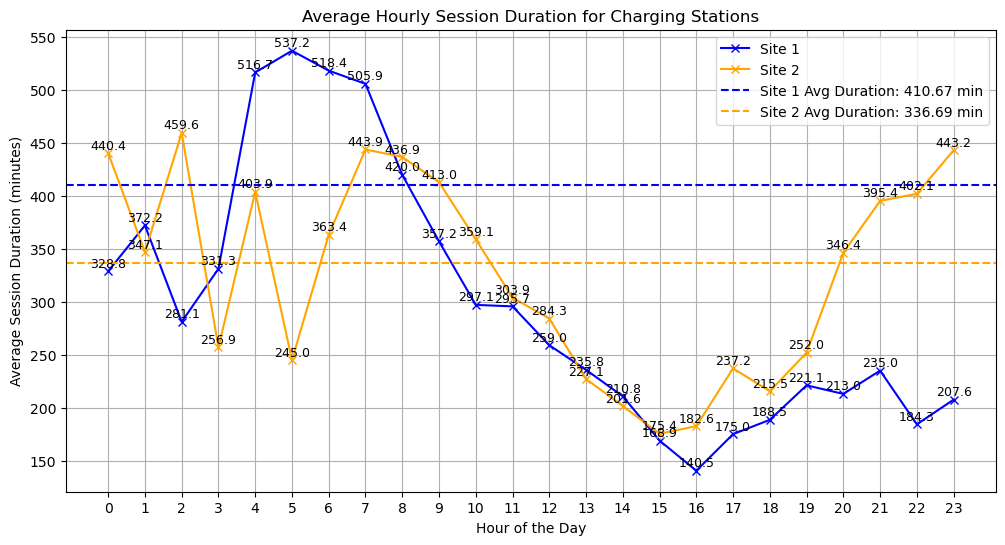

In [113]:
def plot_avg_hourly_session_duration(avg_hourly_duration_1, avg_hourly_duration_2, avg_duration_site1, avg_duration_site2):

    plt.figure(figsize=(12, 6))

    plt.plot(avg_hourly_duration_1['connectionHour'], avg_hourly_duration_1['sessionDuration'], marker='x', label='Site 1', color='blue')
    plt.plot(avg_hourly_duration_2['connectionHour'], avg_hourly_duration_2['sessionDuration'], marker='x', label='Site 2', color='orange')
    plt.axhline(avg_duration_site1, color='blue', linestyle='--', label=f'Site 1 Avg Duration: {avg_duration_site1:.2f} min')
    plt.axhline(avg_duration_site2, color='orange', linestyle='--', label=f'Site 2 Avg Duration: {avg_duration_site2:.2f} min')

    
    plt.title('Average Hourly Session Duration for Charging Stations')
    plt.xlabel('Hour of the Day')
    plt.ylabel('Average Session Duration (minutes)')
    plt.xticks(range(24))

    
    for i, row in avg_hourly_duration_1.iterrows():
        plt.text(row['connectionHour'], row['sessionDuration'] + 1, f'{row["sessionDuration"]:.1f}', ha='center', va='bottom', fontsize=9)

    for i, row in avg_hourly_duration_2.iterrows():
        plt.text(row['connectionHour'], row['sessionDuration'] + 1, f'{row["sessionDuration"]:.1f}', ha='center', va='bottom', fontsize=9)

    
    plt.grid()
    plt.legend()

    plt.show()


plot_avg_hourly_session_duration(
    avg_hourly_duration_site1, 
    avg_hourly_duration_site2, 
    avg_duration_site1, 
    avg_duration_site2
)

# 3. Energy Delivered per Hour

In [127]:
def calculate_energy_delivered_per_hour(site_id, df_ev):

    site_data = df_ev[df_ev['siteID'] == site_id].copy()
    hourly_data = []

    for _, row in site_data.iterrows():
        start_time = row['connectionTime'].floor('H')  # Round connection time to the nearest full hour
        end_time = row['disconnectTime'].floor('H')    # Round disconnect time to the nearest full hour

        # Ensure the duration is non-zero
        if start_time != end_time and (end_time - start_time).total_seconds() > 0:
            current_time = start_time

            while current_time <= end_time:
                # Calculate energy delivered for this hour segment
                energy_per_hour = row['kWhDelivered'] / (end_time - start_time).total_seconds() * 60  # Energy delivered per hour
                hourly_data.append({
                    'stationID': row['stationID'],
                    'connectionDate': current_time.date(),
                    'hour': current_time.hour,
                    'energy_delivered': energy_per_hour
                })
                current_time += pd.Timedelta(hours=1)

    hourly_energy_df = pd.DataFrame(hourly_data)
    hourly_energy_df = hourly_energy_df.drop_duplicates()

    # Aggregate energy delivered by hour
    hourly_energy = hourly_energy_df.groupby('hour')['energy_delivered'].sum().reset_index()

    return hourly_energy

In [128]:

energy_delivered_site1 = calculate_energy_delivered_per_hour(1, df_ev)

energy_delivered_site2 = calculate_energy_delivered_per_hour(2, df_ev)

print(energy_delivered_site1)
print(energy_delivered_site2)

    hour  energy_delivered
0      0         15.390987
1      1          9.068178
2      2          6.145411
3      3          9.592693
4      4         20.423452
5      5         86.999411
6      6        303.373424
7      7        618.687916
8      8        709.068120
9      9        760.179556
10    10        785.917401
11    11        823.141953
12    12        825.662136
13    13        818.023670
14    14        826.920210
15    15        842.489669
16    16        765.110022
17    17        506.717451
18    18        231.816354
19    19        116.430207
20    20         60.535513
21    21         36.982592
22    22         28.267709
23    23         21.756830
    hour  energy_delivered
0      0         58.024943
1      1         49.118874
2      2         45.133730
3      3         42.673831
4      4         44.072564
5      5         50.352541
6      6         92.231790
7      7        138.976931
8      8        264.459377
9      9        373.700729
10    10        437.896527
1

In [129]:
def plot_energy_delivered_per_hour(energy_site1, energy_site2):
    plt.figure(figsize=(12, 6))

    plt.plot(energy_site1['hour'], energy_site1['energy_delivered'], marker='o', label='Energy Delivered Site 1', color='blue')
    plt.plot(energy_site2['hour'], energy_site2['energy_delivered'], marker='o', label='Energy Delivered Site 2', color='orange')

    
    plt.title('Energy Delivered per Hour for Charging Stations')
    plt.xlabel('Hour of the Day')
    plt.ylabel('Energy Delivered (kWh)')
    plt.xticks(range(24))

    # # Add value labels above each point for clarity
    # for i, row in energy_site1.iterrows():
    #     plt.text(row['hour'], row['energy_delivered'] + 0.1, f'{row["energy_delivered"]:.2f}', ha='center', va='bottom', fontsize=9)

    # for i, row in energy_site2.iterrows():
    #     plt.text(row['hour'], row['energy_delivered'] + 0.1, f'{row["energy_delivered"]:.2f}', ha='center', va='bottom', fontsize=9)

    plt.grid()
    plt.legend()

    plt.show()

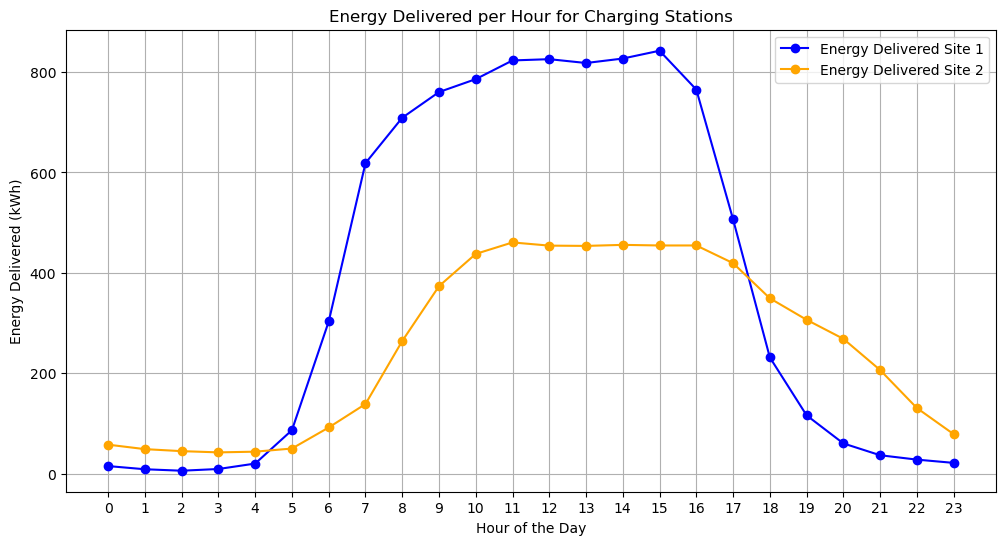

In [130]:
# Example usage:
plot_energy_delivered_per_hour(energy_delivered_site1, energy_delivered_site2)

In [19]:
total_spaces = {
    1: 52,  # Replace with the actual number of spaces for site 1
    2: 54   # Replace with the actual number of spaces for site 2
}

# Create a new DataFrame to hold hourly energy delivered
start_time = df_ev['connectionTime'].min().replace(minute=0, second=0, microsecond=0)
end_time = df_ev['disconnectTime'].max().replace(minute=0, second=0, microsecond=0) + timedelta(hours=1)

# Generate hourly intervals
times = pd.date_range(start=start_time, end=end_time, freq='H')
hourly_energy_data = []

for time in times:
    # For each hour, calculate energy delivered for each site
    hourly_entry = {'hour': time}
    for site in total_spaces.keys():
        # Filter sessions active during the hour for the site
        active_sessions = df_ev[(df_ev['siteID'] == site) &
                                (df_ev['connectionTime'] <= time + timedelta(hours=1)) &
                                (df_ev['disconnectTime'] > time)]
        
        # Calculate total energy delivered
        energy_delivered = active_sessions['kWhDelivered'].sum()
        hourly_entry[f'energy_delivered_{site}'] = energy_delivered

    hourly_energy_data.append(hourly_entry)

# Create DataFrame for hourly energy delivered
hourly_df_kwh = pd.DataFrame(hourly_energy_data)

# Display the result
hourly_df_kwh.head()


,hour,energy_delivered_1,energy_delivered_2
0,2018-04-25 04:00:00-07:00,0.0,7.932
1,2018-04-25 05:00:00-07:00,0.0,7.932
2,2018-04-25 06:00:00-07:00,0.0,23.202
3,2018-04-25 07:00:00-07:00,0.0,60.723
4,2018-04-25 08:00:00-07:00,0.0,130.228


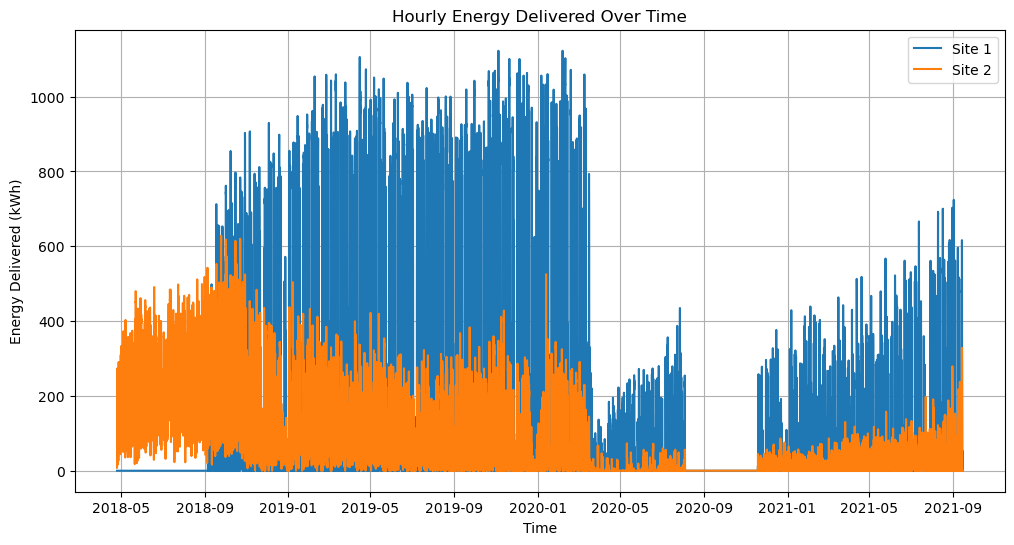

In [143]:


# Plot the energy delivered per hour for each site
plt.figure(figsize=(12, 6))

for site in total_spaces.keys():
    plt.plot(hourly_df_kwh['hour'], hourly_df_kwh[f'energy_delivered_{site}'], label=f'Site {site}')

plt.title('Hourly Energy Delivered Over Time')
plt.xlabel('Time')
plt.ylabel('Energy Delivered (kWh)')
plt.legend()
plt.grid()
plt.show()


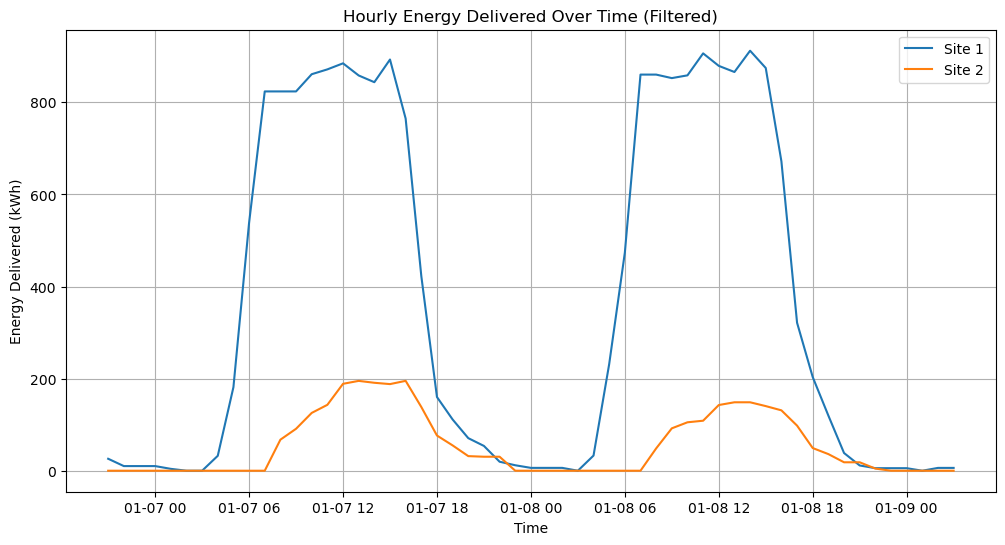

In [25]:
# Define the timeframe for filtering



timezone = pytz.timezone('America/Los_Angeles')
filtered_start_time = datetime(2020, 1, 7, 6, 0).astimezone(timezone)  # Example start time
filtered_end_time = datetime(2020, 1, 9, 12, 0).astimezone(timezone)  # Example end time

# Filter the DataFrame for the selected timeframe
filtered_df = hourly_df_kwh[(hourly_df_kwh['hour'] >= filtered_start_time) & (hourly_df_kwh['hour'] <= filtered_end_time)]

# Visualization: Plot energy delivered per hour
plt.figure(figsize=(12, 6))
for site in total_spaces.keys():
    plt.plot(filtered_df['hour'], filtered_df[f'energy_delivered_{site}'], label=f'Site {site}')

plt.title('Hourly Energy Delivered Over Time (Filtered)')
plt.xlabel('Time')
plt.ylabel('Energy Delivered (kWh)')
plt.legend()
plt.grid()
plt.show()